In [60]:
import numpy as np
import PIL
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [4]:
BASE_DIR = 'd:/Dane/ImageTagger/RetinaColourPinkCheckBox/'

In [5]:
DIR_0 = BASE_DIR + '0/'
DIR_1 = BASE_DIR + '1/'

In [33]:
def create_histogram(file_path):
    img = cv2.imread(file_path)
    img_hsl = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    (h, s, v) = cv2.split(img_hsl)
    h_rav = h.ravel()
    hist = np.histogram(h_rav, bins = 256)
    return hist[0]

In [34]:
def get_images_histograms(folder_path):
    files = os.listdir(folder_path)
    result = []

    for file in files:
        full_file_path = folder_path + file
        h = create_histogram(full_file_path)
        result.append(h)
        
    arr = np.asarray(result)
    return arr

In [35]:
histo_0 = get_images_histograms(DIR_0)

In [36]:
histo_0.shape

(63, 256)

In [37]:
histo_1 = get_images_histograms(DIR_1)

In [38]:
histo_1.shape

(2537, 256)

In [44]:
y_0 = np.zeros((63))
y_1 = np.ones((2537))

In [50]:
y_01 = np.concatenate((y_0, y_1))

In [52]:
histo_01 = np.concatenate((histo_0, histo_1))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(histo_01, y_01, test_size = 0.20, random_state = 42)

In [56]:
model = KNeighborsClassifier(n_neighbors = 3)

In [57]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [58]:
y_predict = model.predict(X_test)

In [61]:
cm = confusion_matrix(y_test, y_predict)

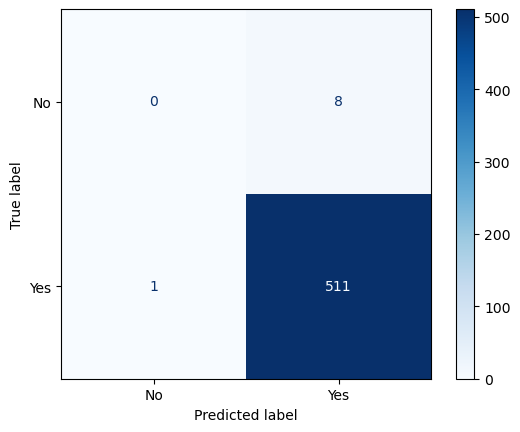

In [62]:
labels = ["No", "Yes"]
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = labels)
disp.plot(cmap = plt.cm.Blues)
plt.show()